<a href="https://colab.research.google.com/github/Shmorodina/ETL/blob/main/%D0%9F%D0%A0_3_%D0%A0%D0%BE%D1%81%D0%BB%D1%8F%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9E_%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API
Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API

**Задание**

3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.


Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olgaroslyakova","key":"ffcc9c65d25c3a6ad42dee533a1fd96e"}'}

Установите `Kaggle API`, используя

In [ ]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь можно получить доступ к наборам данных с помощью клиента

In [ ]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           4613         75  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          24076        519  1.0              
kanchana1990/spotifys-long-hits-2014-2024               Spotify's Long Hits (2014-2024) 🎶              38KB  2024-02-23 12:39:02           1714         44  1.0              
xontoloyo/data-penjualan-zara                           ZARA Sales                                     17KB  2024-02-27 05:37:53  

In [ ]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[syedanwarafridi/vehicle-sales-data,
 nelgiriyewithana/apple-quality,
 kanchana1990/spotifys-long-hits-2014-2024,
 xontoloyo/data-penjualan-zara,
 tarunrm09/climate-change-indicators,
 mikhail1681/walmart-sales,
 dhavalpatel555/us-stock-market-2020-to-2024,
 harshitstark/covid-19-global-statistics-dataset,
 nelgiriyewithana/emotions,
 willianoliveiragibin/drug-overdose-death,
 mikhail1681/mcdonalds-financial-statements-2002-2022,
 kapoorprakhar/college-placement-dataset,
 dansbecker/melbourne-housing-snapshot,
 mustafabayar/europe-sales-records,
 willianoliveiragibin/alcohol-consumption,
 imyjoshua/average-time-spent-by-a-user-on-social-media,
 kanchana1990/2024s-most-watched-youtube-videos,
 kanchana1990/best-buy-2024-windows-laptops,
 verracodeguacas/pii-deberta-models,
 aadharshviswanath/flight-data]

In [ ]:
# поиск наборов данных в Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="comedy")

print(datasets)

[{'subtitleNullable': 'Every show in town and information about if the person went or not to see it.', 'creatorNameNullable': 'Mau Rua', 'creatorUrlNullable': 'mruanova', 'totalBytesNullable': 294, 'urlNullable': 'https://www.kaggle.com/datasets/mruanova/comedy-shows', 'licenseNameNullable': 'CC0: Public Domain', 'descriptionNullable': None, 'ownerNameNullable': 'Mau Rua', 'ownerRefNullable': 'mruanova', 'titleNullable': 'comedy shows', 'currentVersionNumberNullable': 1, 'usabilityRatingNullable': 1.0, 'id': 843835, 'ref': 'mruanova/comedy-shows', 'subtitle': 'Every show in town and information about if the person went or not to see it.', 'hasSubtitle': True, 'creatorName': 'Mau Rua', 'hasCreatorName': True, 'creatorUrl': 'mruanova', 'hasCreatorUrl': True, 'totalBytes': 294, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/mruanova/comedy-shows', 'hasUrl': True, 'lastUpdated': '2020-08-24T19:21:21.503Z', 'downloadCount': 1351, 'isPrivate': False, 'isFeatured': False, 'lic

In [ ]:
!kaggle datasets list -s "comedy"

ref                                                             title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mruanova/comedy-shows                                           comedy shows                              294B  2020-08-24 19:21:21           1351          8  1.0              
uciml/youtube-comedy-slam                                       YouTube Comedy Slam                        7MB  2017-09-20 15:53:44            353         11  0.7647059        
pavellexyr/one-million-reddit-jokes                             One Million Reddit Jokes                  93MB  2021-10-25 20:04:43            375         26  1.0              
thec03u5/seinfeld-chronicles                                    Seinfeld Chronicles                        1MB  201

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
datasets = kaggle.api.datasets_list(search="comedy")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

2024-03-01 12:56:17,533 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/list?search=comedy


,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,Every show in town and information about if th...,Mau Rua,mruanova,294,https://www.kaggle.com/datasets/mruanova/comed...,CC0: Public Domain,None,Mau Rua,mruanova,comedy shows,...,0,6916,8,1,True,1.000000,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
1,Votes for the funniest videos,Chris Crawford,crawford,7176382,https://www.kaggle.com/datasets/uciml/youtube-...,CC0: Public Domain,None,UCI Machine Learning,organizations/uciml,YouTube Comedy Slam,...,0,9078,11,1,True,0.764706,True,"[{'nameNullable': 'social science', 'descripti...",[],[]
2,One million jokes straight from Reddit's top c...,Lexyr,pavellexyr,97377552,https://www.kaggle.com/datasets/pavellexyr/one...,Attribution 4.0 International (CC BY 4.0),None,Lexyr,pavellexyr,One Million Reddit Jokes,...,0,6506,26,1,True,1.000000,True,"[{'nameNullable': 'culture and humanities', 'd...",[],[]
3,Complete Seinfeld Scripts and Episode Details,Aman Shrivastava,thec03u5,1448419,https://www.kaggle.com/datasets/thec03u5/seinf...,CC BY-SA 4.0,None,Aman Shrivastava,thec03u5,Seinfeld Chronicles,...,0,34630,143,1,True,0.705882,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
4,movie posters with there respected genres,raman,raman77768,259590154,https://www.kaggle.com/datasets/raman77768/mov...,CC0: Public Domain,None,raman,raman77768,Movie Posters,...,0,19902,31,1,True,0.911765,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
5,Around 20K titles for data and game enthusiasts,Muhammad Adil Talay,muhammadadiltalay,1491496,https://www.kaggle.com/datasets/muhammadadilta...,CC0: Public Domain,None,Muhammad Adil Talay,muhammadadiltalay,IMDB Video Games,...,0,16616,58,1,True,0.970588,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
6,Tiktok popular hashtags datset,Muhammad Anas Mahmood,muhammadanasmahmood,733532,https://www.kaggle.com/datasets/muhammadanasma...,CC0: Public Domain,None,Muhammad Anas Mahmood,muhammadanasmahmood,TikTok Dataset,...,0,18957,71,2,True,0.823529,True,"[{'nameNullable': 'internet', 'descriptionNull...",[],[]
7,Identify the type of news based on headlines a...,Rishabh Misra,rmisra,27829769,https://www.kaggle.com/datasets/rmisra/news-ca...,Attribution 4.0 International (CC BY 4.0),None,Rishabh Misra,rmisra,News Category Dataset,...,0,413833,718,3,True,1.000000,True,"[{'nameNullable': 'linguistics', 'descriptionN...",[],[]
8,Scraped IMBd data for the comedy show New Girl,Senad Ceca,senadc,28649,https://www.kaggle.com/datasets/senadc/new-gir...,CC BY-SA 4.0,None,Senad Ceca,senadc,New Girl IMBd Data,...,0,813,6,1,True,0.823529,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
9,Bo Burnham's 2010 Musical Comedy Album: WORDS ...,Mara Globosky,maraglobosky,16307,https://www.kaggle.com/datasets/maraglobosky/b...,Other (specified in description),None,Mara Globosky,maraglobosky,Bo Burnham: Words Words Words,...,0,413,8,4,True,0.823529,True,"[{'nameNullable': 'music', 'descriptionNullabl...",[],[]


In [ ]:
df1.to_excel("comedy.xlsx", sheet_name='comedy')

In [ ]:
from google.colab import files
files.download('comedy.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Изучим датасет **Netflix Movies and Shows**


Download Dataset.

In [ ]:
!kaggle datasets download -d maso0dahmed/netflix-movies-and-shows

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 73.8MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("netflix-movies-and-shows.zip","r") as zip_ref:

    # Распакоувыем зип
    zip_ref.extractall()



In [ ]:
!ls

comedy.xlsx  imdb_movies_shows.csv  kaggle.json  netflix-movies-and-shows.zip  sample_data


In [ ]:
# reading the contents
df = pd.read_csv("imdb_movies_shows.csv")

# printing first 6 raws of the dataframe
df.head(100)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
95,The Little Wars,MOVIE,1982,NaN,108,"['drama', 'war', 'european']","['FR', 'LB']",NaN,tt0084492,6.3,149.0
96,Bill Hicks: Sane Man,MOVIE,1989,R,81,['comedy'],['US'],NaN,NaN,NaN,NaN
97,Duniya,MOVIE,1984,NaN,170,"['drama', 'action']",['IN'],NaN,tt0301231,6.2,241.0
98,High Risk,SHOW,1988,TV-PG,50,['comedy'],['US'],1.0,tt0094478,3.8,6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [ ]:
my_df =df[['title','type','release_year','runtime','production_countries','imdb_score','imdb_votes']].copy()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   runtime               5806 non-null   int64  
 4   production_countries  5806 non-null   object 
 5   imdb_score            5283 non-null   float64
 6   imdb_votes            5267 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 317.6+ KB


In [ ]:
my_df

,title,type,release_year,runtime,production_countries,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,48,['US'],NaN,NaN
1,Taxi Driver,MOVIE,1976,113,['US'],8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,91,['GB'],8.2,530877.0
3,Life of Brian,MOVIE,1979,94,['GB'],8.0,392419.0
4,The Exorcist,MOVIE,1973,133,['US'],8.1,391942.0
...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,100,['NG'],6.9,39.0
5802,Edis Starlight,MOVIE,2021,74,[],NaN,NaN
5803,Clash,MOVIE,2021,88,"['NG', 'CA']",6.5,32.0
5804,Shadow Parties,MOVIE,2021,116,[],6.2,9.0


In [ ]:
my_df.isnull().values.any()

True

In [ ]:
my_df.isnull().any().any() #То же самое что и .values.any()

True

In [ ]:
my_df.isnull().any() #Команда, которая выводит информацию о столбцах, а именно наличие в них пропущенных значений

title                    True
type                    False
release_year            False
runtime                 False
production_countries    False
imdb_score               True
imdb_votes               True
dtype: bool

In [ ]:
my_df.isnull().sum() #Количество пропущенных значений в столбце

title                     1
type                      0
release_year              0
runtime                   0
production_countries      0
imdb_score              523
imdb_votes              539
dtype: int64

In [ ]:
df.isnull().sum().sum() #Количество пропущенных значений

7876

In [ ]:
my_df.isna().sum()/(len(df))*100 #df.isna=df.isnull

title                   0.017224
type                    0.000000
release_year            0.000000
runtime                 0.000000
production_countries    0.000000
imdb_score              9.007923
imdb_votes              9.283500
dtype: float64

In [ ]:
my_df.isnull().sum()/(len(df))*100 #Количество пропущенных значений в процентах от всего столбца

title                   0.017224
type                    0.000000
release_year            0.000000
runtime                 0.000000
production_countries    0.000000
imdb_score              9.007923
imdb_votes              9.283500
dtype: float64

In [ ]:
df2 = my_df.dropna() #Удаляем пропущенные значения

In [ ]:
df2

,title,type,release_year,runtime,production_countries,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,113,['US'],8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,91,['GB'],8.2,530877.0
3,Life of Brian,MOVIE,1979,94,['GB'],8.0,392419.0
4,The Exorcist,MOVIE,1973,133,['US'],8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,30,['GB'],8.8,72895.0
...,...,...,...,...,...,...,...
5800,Momshies! Your Soul is Mine,MOVIE,2021,108,['PH'],5.8,26.0
5801,Fine Wine,MOVIE,2021,100,['NG'],6.9,39.0
5803,Clash,MOVIE,2021,88,"['NG', 'CA']",6.5,32.0
5804,Shadow Parties,MOVIE,2021,116,[],6.2,9.0


In [ ]:
df2.isnull().values.any()

False

In [ ]:
df2.to_csv("clear.csv")
from google.colab import files
files.download('clear.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

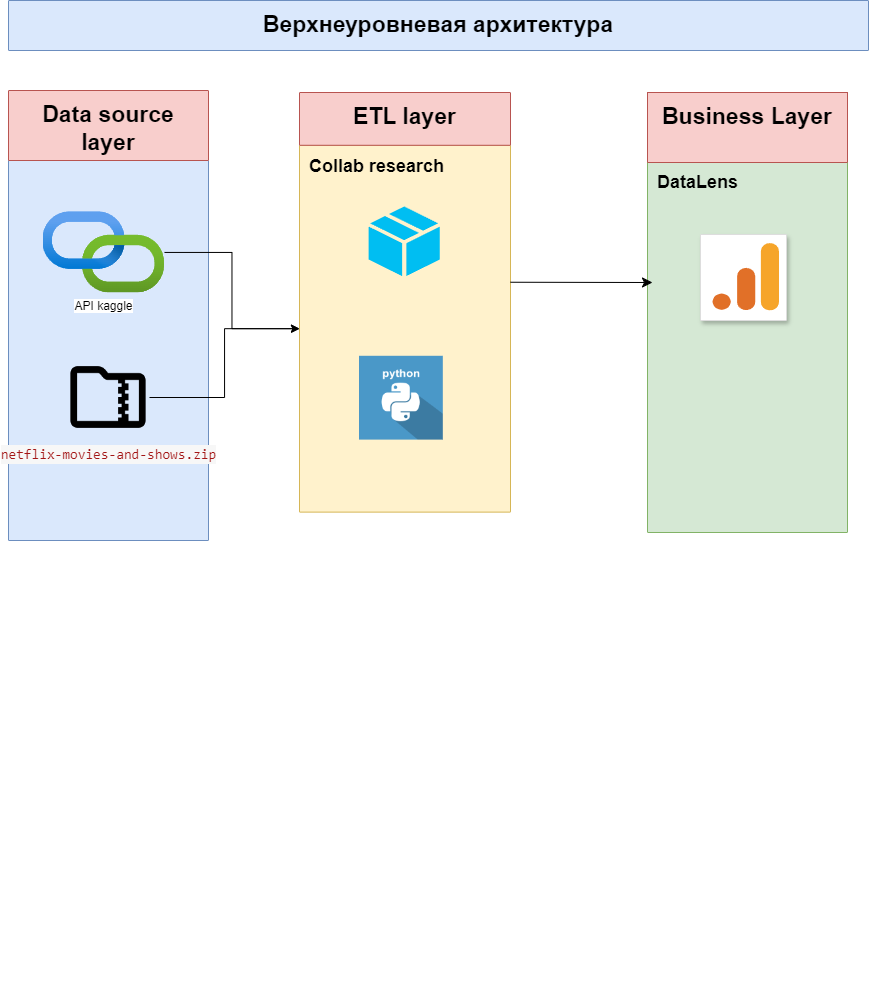

# Самостоятельная работа


3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.

**Вариант**.

`1-11` поиск ведем по ключевым словам,

вариант `12-35` - по названию Датасета.

`Ключевые слова`:

1. ENTERTAINMENT.
2. TRAVEL.
3. STYLE & BEAUTY.
4. PARENTING.
5. HEALTHY LIVING.
6. FOOD & DRINK.
7. BUSINESS.
8. COMEDY.
9. SPORTS.
10. HOME & LIVING.
11. PARENTS.

`ДАТАСЕТ`:

12. Credit Card Fraud Detection.
13. European Soccer Database.
14. Avocado Prices.
15. IBM HR Analytics Employee Attrition & Performance.
16. Medical Cost Personal Datasets.
17. Open Food Facts.
18. Machine Learning & Data Science Survey.
19. Survival Rate of Russian Companies.
20. Yandex: Geo Reviews Dataset 2023.
21. Yandex Music TOP 100 songs.
22. HeadHunter vacancies.
23. Russian Marketplace Reviews E-Commerce Dataset.
24. world economic.
25. credit card transicts.